# Mettre en place notre environnement
________

La première chose que nous devons faire est de charger les bibliothèques et les ensembles de données que nous allons utiliser. Pour aujourd'hui, nous allons travailler avec deux ensembles de données : un contenant des chroniques de température dans le lit de la rivière (zone hyporhéique), et un autre contenant des les chroniques de différence de charge enregistré en **Volt**.

**Important!** Assurez-vous d'exécuter cette cellule vous-même ou le reste de votre code ne fonctionnera pas

In [1]:
# modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

# read in our data
capteur_riviere = pd.read_csv("C:/Users/Max/Documents/Mines/Molonari/MOLONARI_1D_RESOURCES/sampling_points/Point034/point034_P_measures.csv")
capteur_ZH = pd.read_csv("C:/Users/Max/Documents/Mines/Molonari/MOLONARI_1D_RESOURCES/sampling_points/Point034/point034_T_measures.csv")
etalonage_capteur_riv = pd.read_csv("C:/Users/Max/Documents/Mines/Molonari/MOLONARI_1D_RESOURCES/configuration/pressure_sensors/P508.csv")

# set seed for reproducibility
np.random.seed(0)

Nous sommes maintenant prêts à examiner quelques dates ! (Si vous le souhaitez, vous pouvez profiter de cette occasion pour jeter un coup d'œil à certaines des données).

# Imprimez le noms des colonnes
renommer les colonnes du fichier capteur_riviere :  	dates,tension_V,temperature_stream_C et celles du fichier capteur_ZH  :
#,dates,temperature_depth_1_C,temperature_depth_2_C,temperature_depth_3_C,temperature_depth_4_C



In [2]:
capteur_riviere.columns = ['indice','dates', 'tension_V','temperature_stream_C','','','']

In [3]:
capteur_riviere.head()

,indice,dates,tension_V,temperature_stream_C,,,
0,1.0,06/27/16 12:00:00 PM,1.26787,18.342,NaN,NaN,NaN
1,2.0,06/27/16 12:15:00 PM,1.06630,13.898,NaN,NaN,NaN
2,3.0,06/27/16 12:30:00 PM,1.20661,13.915,NaN,NaN,NaN
3,4.0,06/27/16 12:45:00 PM,1.24533,13.939,NaN,NaN,NaN
4,5.0,06/27/16 01:00:00 PM,1.24437,13.967,NaN,NaN,NaN


In [4]:
capteur_ZH.columns = ['indice','dates', 'temperature_depth_1_C','temperature_depth_2_C','temperature_depth_3_C','temperature_depth_4_C','','','']
capteur_ZH.head()

,indice,dates,temperature_depth_1_C,temperature_depth_2_C,temperature_depth_3_C,temperature_depth_4_C,,,
0,1,06/27/16 12:00:00 PM,13.810,13.834,13.858,13.810,NaN,NaN,NaN
1,2,06/27/16 12:15:00 PM,13.834,13.858,13.882,13.834,NaN,NaN,NaN
2,3,06/27/16 12:30:00 PM,13.930,13.954,14.050,14.002,NaN,NaN,NaN
3,4,06/27/16 12:45:00 PM,13.882,13.954,14.026,13.954,NaN,NaN,NaN
4,5,06/27/16 01:00:00 PM,13.858,13.930,14.026,13.954,NaN,NaN,NaN


# Transformez les données de différence de charge en mètres



In [5]:
etalonage_capteur_riv.head()

,Sensor_Name,P508
0,Datalogger,Rasberry PI
1,Calibration_Date,2016/01/12 10:10:10
2,Intercept,1.210344
3,dU/dH,-1.462495
4,dU/dT,0.001474


In [6]:
dudh = float(etalonage_capteur_riv['P508'][3])

$dU = Intercept + dH\frac{dU}{dH}+dT\frac{dU}{dT}$
Donc $dH = \frac{dU - dT\frac{dU}{dT}-Intercept}{\frac{dU}{dH}}$

In [7]:
capteur_riviere['deltaH'] = (capteur_riviere['tension_V']-capteur_riviere['temperature_stream_C']*float(etalonage_capteur_riv['P508'][4])-float(etalonage_capteur_riv['P508'][2]))/dudh

In [8]:
capteur_riviere

,indice,dates,tension_V,temperature_stream_C,,,,deltaH
0,1.0,06/27/16 12:00:00 PM,1.26787,18.342,NaN,NaN,NaN,-0.020848
1,2.0,06/27/16 12:15:00 PM,1.06630,13.898,NaN,NaN,NaN,0.112499
2,3.0,06/27/16 12:30:00 PM,1.20661,13.915,NaN,NaN,NaN,0.016578
3,4.0,06/27/16 12:45:00 PM,1.24533,13.939,NaN,NaN,NaN,-0.009873
4,5.0,06/27/16 01:00:00 PM,1.24437,13.967,NaN,NaN,NaN,-0.009189
...,...,...,...,...,...,...,...,...
1455,1447.0,07/12/2016 15:45,1.13668,9.126,NaN,NaN,NaN,0.059567
1456,1447.7,07/12/2016 16:00,1.33513,9.157,NaN,NaN,NaN,-0.076095
1457,1448.4,07/12/2016 16:15,1.38926,9.199,NaN,NaN,NaN,-0.113065
1458,1449.1,07/12/2016 16:30,1.41386,9.244,NaN,NaN,NaN,-0.129840


# Traitement des dates
## Vérifiez le type de données de notre colonne de date
___

Imprimer les dates des deux fichiers

In [9]:
print(list(capteur_ZH['dates']))

['06/27/16 12:00:00 PM', '06/27/16 12:15:00 PM', '06/27/16 12:30:00 PM', '06/27/16 12:45:00 PM', '06/27/16 01:00:00 PM', '06/27/16 01:15:00 PM', '06/27/16 01:30:00 PM', '06/27/16 01:45:00 PM', '06/27/16 02:00:00 PM', '06/27/16 02:15:00 PM', '06/27/16 02:30:00 PM', '06/27/16 02:45:00 PM', '06/27/16 03:00:00 PM', '06/27/16 03:15:00 PM', '06/27/16 03:30:00 PM', '06/27/16 03:45:00 PM', '06/27/16 04:00:00 PM', '06/27/16 04:15:00 PM', '06/27/16 04:30:00 PM', '06/27/16 04:45:00 PM', '06/27/16 05:00:00 PM', '06/27/16 05:15:00 PM', '06/27/16 05:30:00 PM', '06/27/16 05:45:00 PM', '06/27/16 06:00:00 PM', '06/27/16 06:15:00 PM', '06/27/16 06:30:00 PM', '06/27/16 06:45:00 PM', '06/27/16 07:00:00 PM', '06/27/16 07:15:00 PM', '06/27/16 07:30:00 PM', '06/27/16 07:45:00 PM', '06/27/16 08:00:00 PM', '06/27/16 08:15:00 PM', '06/27/16 08:30:00 PM', '06/27/16 08:45:00 PM', '06/27/16 09:00:00 PM', '06/27/16 09:15:00 PM', '06/27/16 09:30:00 PM', '06/27/16 09:45:00 PM', '06/27/16 10:00:00 PM', '06/27/16 10:15

In [10]:
print(list(capteur_riviere['dates']))

['06/27/16 12:00:00 PM', '06/27/16 12:15:00 PM', '06/27/16 12:30:00 PM', '06/27/16 12:45:00 PM', '06/27/16 01:00:00 PM', '06/27/16 01:15:00 PM', '06/27/16 01:30:00 PM', '06/27/16 01:45:00 PM', '06/27/16 02:00:00 PM', '06/27/16 02:15:00 PM', '06/27/16 02:30:00 PM', '06/27/16 02:45:00 PM', '06/27/16 03:00:00 PM', '06/27/16 03:15:00 PM', '06/27/16 03:30:00 PM', '06/27/16 03:45:00 PM', '06/27/16 04:00:00 PM', '06/27/16 04:15:00 PM', '06/27/16 04:30:00 PM', '06/27/16 04:45:00 PM', '06/27/16 05:00:00 PM', '06/27/16 05:15:00 PM', '06/27/16 05:30:00 PM', '06/27/16 05:45:00 PM', '06/27/16 06:00:00 PM', '06/27/16 06:15:00 PM', '06/27/16 06:30:00 PM', '06/27/16 06:45:00 PM', '06/27/16 07:00:00 PM', '06/27/16 07:15:00 PM', '06/27/16 07:30:00 PM', '06/27/16 07:45:00 PM', '06/27/16 08:00:00 PM', '06/27/16 08:15:00 PM', '06/27/16 08:30:00 PM', '06/27/16 08:45:00 PM', '06/27/16 09:00:00 PM', '06/27/16 09:15:00 PM', '06/27/16 09:30:00 PM', '06/27/16 09:45:00 PM', '06/27/16 10:00:00 PM', '06/27/16 10:15

Remarquez qu'en bas de la sortie de `head()`, vous pouvez voir qu'il est dit que le type de données de cette colonne est "object". 

> Pandas utilise le dtype "object" pour stocker différents types de données, mais le plus souvent, lorsque vous voyez une colonne avec le dtype "object", elle contient des chaînes de caractères. 

Si vous consultez la documentation sur le dtype de Pandas [ici] (http://pandas.pydata.org/pandas-docs/stable/basics.html#dtypes), vous remarquerez qu'il existe également un dtype spécifique `datetime64`. Comme le dtype de notre colonne est `object` plutôt que `datetime64`, nous pouvons dire que Python ne sait pas que cette colonne contient des dates.

Nous pouvons aussi regarder uniquement le dtype de votre colonne sans imprimer les premières lignes si nous le souhaitons :

In [11]:
# check the data type of our date column
type(capteur_riviere['dates'][0])

str

You may have to check the [numpy documentation](https://docs.scipy.org/doc/numpy-1.12.0/reference/generated/numpy.dtype.kind.html#numpy.dtype.kind) to match the letter code to the dtype of the object. "O" is the code for "object", so we can see that these two methods give us the same information.

## Convertir nos colonnes de date en datetime
___

Maintenant que nous savons que notre colonne de date n'est pas reconnue comme une date, il est temps de la convertir pour qu'elle soit reconnue comme une date. Cette opération est appelée "analyse syntaxique des dates" car nous prenons une chaîne de caractères et identifions ses composants. Nous allons utiliser la fonction pd.to_datetime.

Nous pouvons indiquer à pandas le format de nos dates à l'aide d'un guide appelé ["strftime directive", sur lequel vous trouverez plus d'informations à ce lien] (http://strftime.org/). L'idée de base est que vous devez indiquer quelles parties de la date se trouvent où et quelle ponctuation se trouve entre elles. Il existe [de nombreuses parties possibles d'une date](http://strftime.org/), mais les plus courantes sont `%d` pour le jour, `%m` pour le mois, `%y` pour une année à deux chiffres et `%Y` pour une année à quatre chiffres.

Quelques exemples :

 * Le 17 janvier 2007 a le format "%m/%d/%y".
 * 17-1-2007 a le format "%d-%m-%Y".
 

In [12]:
capteur_ZH['date'] = pd.to_datetime(capteur_ZH['dates'],format = "%m/%d/%y %I:%M:%S %p",infer_datetime_format=True)

In [13]:
capteur_riviere['date'] = pd.to_datetime(capteur_riviere['dates'],infer_datetime_format=True)

In [14]:
capteur_riviere['date']

0      2016-06-27 12:00:00
1      2016-06-27 12:15:00
2      2016-06-27 12:30:00
3      2016-06-27 12:45:00
4      2016-06-27 13:00:00
               ...        
1455   2016-07-12 15:45:00
1456   2016-07-12 16:00:00
1457   2016-07-12 16:15:00
1458   2016-07-12 16:30:00
1459   2016-07-12 16:45:00
Name: date, Length: 1460, dtype: datetime64[ns]

In [15]:
capteur_ZH['date'][0]

Timestamp('2016-06-27 12:00:00')

Maintenant que nos dates sont analysées correctement, nous pouvons travailler avec celles-ci.

___
* Bien que nous spécifions le format de la date ici, il arrive parfois que vous rencontriez une erreur lorsque plusieurs formats de date sont présents dans une même colonne. Dans ce cas, vous pouvez demander à pandas de déduire le bon format de date. Vous pouvez le faire comme suit :

`capteur_riviere['date'] = pd.to_datetime(capteur_riviere['date'], infer_datetime_format=True)``

**Pourquoi ne pas toujours utiliser `infer_datetime_format = True?`** Il y a deux grandes raisons de ne pas toujours faire deviner à pandas le format de l'heure. La première est que pandas n'est toujours capable de trouver le bon format de date, surtout si quelqu'un a fait preuve de créativité dans la saisie des données. La seconde est que c'est beaucoup plus lent que de spécifier le format exact des dates.
____

## Tracer le jour du mois pour vérifier l'analyse de la date
___

L'un des plus grands dangers de l'analyse des dates est de mélanger les mois et les jours. La fonction to_datetime() a des messages d'erreur très utiles, mais il n'est pas inutile de vérifier que les jours du mois que nous avons extraits ont un sens. 

Pour ce faire, nous allons tracer un histogramme des jours du mois. Nous nous attendons à ce qu'il ait des valeurs entre 1 et 31 et, puisqu'il n'y a aucune raison de supposer que les glissements de terrain sont plus fréquents certains jours du mois que d'autres, une distribution relativement égale. (Avec un creux sur 31 car tous les mois n'ont pas 31 jours.) 

In [16]:
capteur_riviere['jour'] = capteur_riviere['date'].apply(lambda x: x.day)

In [17]:
capteur_riviere

,indice,dates,tension_V,temperature_stream_C,,,,deltaH,date,jour
0,1.0,06/27/16 12:00:00 PM,1.26787,18.342,NaN,NaN,NaN,-0.020848,2016-06-27 12:00:00,27
1,2.0,06/27/16 12:15:00 PM,1.06630,13.898,NaN,NaN,NaN,0.112499,2016-06-27 12:15:00,27
2,3.0,06/27/16 12:30:00 PM,1.20661,13.915,NaN,NaN,NaN,0.016578,2016-06-27 12:30:00,27
3,4.0,06/27/16 12:45:00 PM,1.24533,13.939,NaN,NaN,NaN,-0.009873,2016-06-27 12:45:00,27
4,5.0,06/27/16 01:00:00 PM,1.24437,13.967,NaN,NaN,NaN,-0.009189,2016-06-27 13:00:00,27
...,...,...,...,...,...,...,...,...,...,...
1455,1447.0,07/12/2016 15:45,1.13668,9.126,NaN,NaN,NaN,0.059567,2016-07-12 15:45:00,12
1456,1447.7,07/12/2016 16:00,1.33513,9.157,NaN,NaN,NaN,-0.076095,2016-07-12 16:00:00,12
1457,1448.4,07/12/2016 16:15,1.38926,9.199,NaN,NaN,NaN,-0.113065,2016-07-12 16:15:00,12
1458,1449.1,07/12/2016 16:30,1.41386,9.244,NaN,NaN,NaN,-0.129840,2016-07-12 16:30:00,12


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FC43C75F40>]],
      dtype=object)

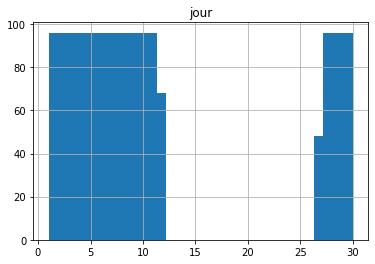

In [18]:
capteur_riviere.hist(column = ['jour'],bins=31)

L'histogramme n'est pas plat, mais après vérification des fichiers csv, les jours sont en effe toujours compris entre les 27 d'un mois et le 12 du suivant. Donc Les dates ont été bien converties.

# Valeurs aberrantes

L'un des plus grands défis du nettoyage des données est l'identification et le traitement des valeurs aberrantes. En termes simples, les valeurs aberrantes sont des observations qui sont significativement différentes des autres points de données. Même les meilleurs algorithmes d'estimation des paramètres automatique seront moins performants si les observations aberrantes ne sont pas nettoyées des données, car elles impliquent des simulations obsolètes des variables.



In [19]:
print(capteur_riviere.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   indice                1460 non-null   float64       
 1   dates                 1460 non-null   object        
 2   tension_V             1460 non-null   float64       
 3   temperature_stream_C  1460 non-null   float64       
 4                         0 non-null      float64       
 5                         0 non-null      float64       
 6                         0 non-null      float64       
 7   deltaH                1460 non-null   float64       
 8   date                  1460 non-null   datetime64[ns]
 9   jour                  1460 non-null   int64         
dtypes: datetime64[ns](1), float64(7), int64(1), object(1)
memory usage: 114.2+ KB
None


## Identification des valeurs aberrantes

La présence de valeurs aberrantes dans les données peut avoir de nombreuses raisons. Parfois, les valeurs aberrantes peuvent être authentiques, alors que dans d'autres cas, elles peuvent être dues à des erreurs de saisie de données. Il est important de comprendre les raisons des valeurs aberrantes avant de les nettoyer.

Nous allons commencer le processus de recherche des valeurs aberrantes en exécutant les statistiques sommaires sur les variables. Pour ce faire, nous utilisons la fonction describe() ci-dessous, qui fournit un résumé statistique de toutes les variables quantitatives.




In [20]:
print(capteur_riviere.describe())

            indice    tension_V  temperature_stream_C                 \
count  1460.000000  1460.000000           1460.000000  0.0  0.0  0.0   
mean    730.389247     1.256888             14.896441  NaN  NaN  NaN   
std     421.421616     0.047302              1.142397  NaN  NaN  NaN   
min       1.000000     0.652670              9.066000  NaN  NaN  NaN   
25%     365.750000     1.246590             14.203750  NaN  NaN  NaN   
50%     730.500000     1.262150             14.818000  NaN  NaN  NaN   
75%    1095.250000     1.270010             15.555000  NaN  NaN  NaN   
max    1449.800000     1.432100             18.342000  NaN  NaN  NaN   

            deltaH         jour  
count  1460.000000  1460.000000  
mean     -0.016812    11.506849  
std       0.032176     9.880885  
min      -0.140099     1.000000  
25%      -0.025327     4.000000  
50%      -0.020557     8.000000  
75%      -0.009784    12.000000  
max       0.390494    30.000000  


## Tracez les graphiques de distribution pour les différentes variables

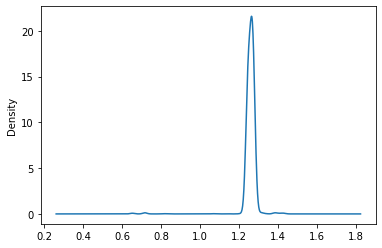

In [21]:
capteur_riviere['tension_V'].plot.kde()

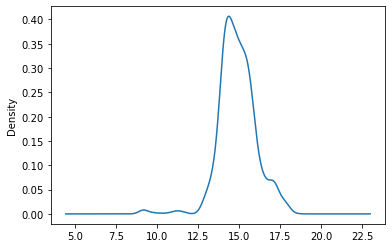

In [22]:
capteur_riviere['temperature_stream_C'].plot.kde()

### 1.Box plot

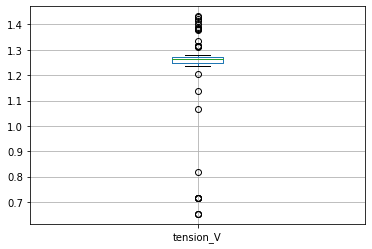

In [26]:
capteur_riviere.boxplot(column=['tension_V'])

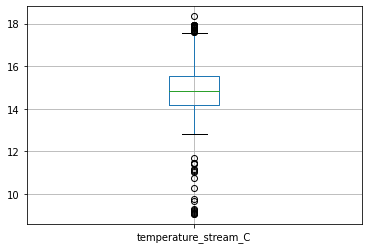

In [25]:
capteur_riviere.boxplot(column=['temperature_stream_C'])  

### 2.Histogramme

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FC4489E970>,
      dtype=object)

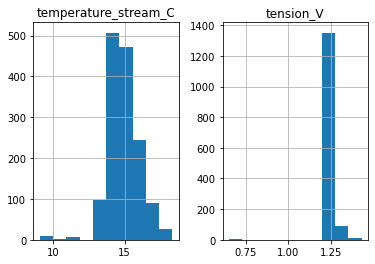

In [29]:
capteur_riviere.hist(column=['temperature_stream_C','tension_V']) 

### 3.Scatterplot

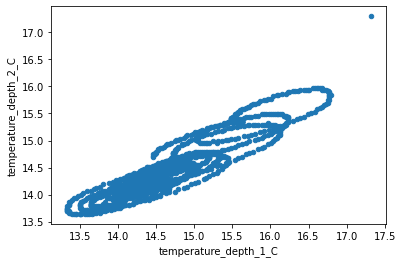

In [30]:
capteur_ZH.plot.scatter(x='temperature_depth_1_C',y='temperature_depth_2_C')

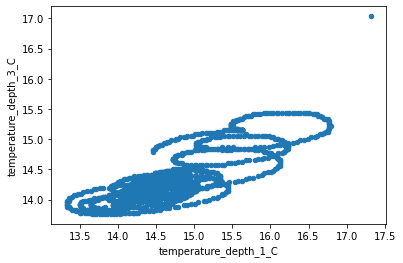

In [31]:
capteur_ZH.plot.scatter(x='temperature_depth_1_C',y='temperature_depth_3_C')

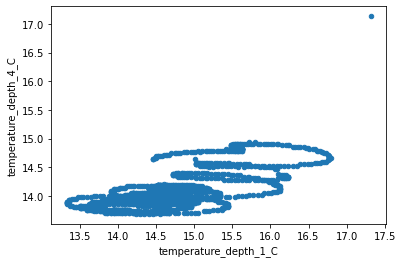

In [33]:
capteur_ZH.plot.scatter(x='temperature_depth_1_C',y='temperature_depth_4_C')

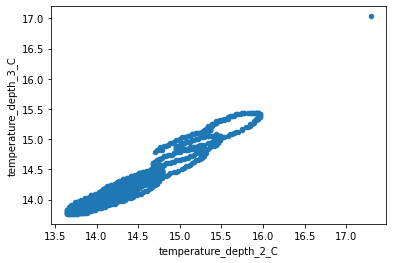

In [34]:
capteur_ZH.plot.scatter(x='temperature_depth_2_C',y='temperature_depth_3_C')

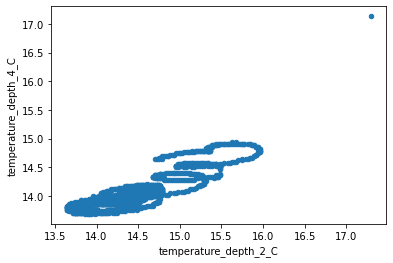

In [35]:
capteur_ZH.plot.scatter(x='temperature_depth_2_C',y='temperature_depth_4_C')

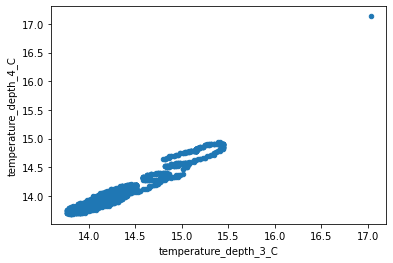

In [36]:
capteur_ZH.plot.scatter(x='temperature_depth_3_C',y='temperature_depth_4_C')

## Trouver les valeurs limites

In [37]:
capteur_riviere.loc[(capteur_riviere['tension_V']>1.4) | (capteur_riviere['tension_V']<1.1) | (capteur_riviere['temperature_stream_C']<10) | (capteur_riviere['tension_V']>20)]

,indice,dates,tension_V,temperature_stream_C,,,,deltaH,date,jour
1,2.0,06/27/16 12:15:00 PM,1.06630,13.898,NaN,NaN,NaN,0.112499,2016-06-27 12:15:00,27
1434,1435.0,07/12/2016 10:30,0.71706,14.306,NaN,NaN,NaN,0.351708,2016-07-12 10:30:00,12
1435,1435.0,07/12/2016 10:45,0.71706,14.306,NaN,NaN,NaN,0.351708,2016-07-12 10:45:00,12
1436,1435.0,07/12/2016 11:00,0.71706,14.306,NaN,NaN,NaN,0.351708,2016-07-12 11:00:00,12
1437,1435.0,07/12/2016 11:15,0.71706,14.306,NaN,NaN,NaN,0.351708,2016-07-12 11:15:00,12
1438,1435.0,07/12/2016 11:30,0.71706,14.306,NaN,NaN,NaN,0.351708,2016-07-12 11:30:00,12
1439,1435.0,07/12/2016 11:45,0.81706,14.306,NaN,NaN,NaN,0.283332,2016-07-12 11:45:00,12
1440,1436.0,07/12/2016 12:00,1.43210,11.440,NaN,NaN,NaN,-0.140099,2016-07-12 12:00:00,12
1450,1443.5,07/12/2016 14:30,1.40303,9.789,NaN,NaN,NaN,-0.121886,2016-07-12 14:30:00,12
1451,1444.2,07/12/2016 14:45,1.42271,9.691,NaN,NaN,NaN,-0.135441,2016-07-12 14:45:00,12


In [38]:
capteur_ZH.loc[(capteur_ZH['temperature_depth_1_C']>17) | (capteur_ZH['temperature_depth_2_C']>16.5) | (capteur_ZH['temperature_depth_3_C']>16.5) | (capteur_ZH['temperature_depth_4_C']>16.5)]

,indice,dates,temperature_depth_1_C,temperature_depth_2_C,temperature_depth_3_C,temperature_depth_4_C,,,,date
1435,1436,07/12/16 10:45:00 AM,17.32,17.296,17.034,17.13,NaN,NaN,NaN,2016-07-12 10:45:00
